In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# Specify the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# Define the column names based on the dataset description
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", 
    "num-of-doors", "body-style", "drive-wheels", "engine-location", 
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type", 
    "num-of-cylinders", "engine-size", "fuel-system", "horsepower", 
    "peak-rpm", "city-mpg", "highway-mpg", "price"
]

# Load the dataset into a pandas DataFrame
auto_data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
auto_data.head()

symboling normalized-losses  make    fuel-type aspiration  \
3 ?   alfa-romero       gas               std   two  convertible        rwd   
      alfa-romero       gas               std   two  convertible        rwd   
1 ?   alfa-romero       gas               std   two    hatchback        rwd   
2 164 audi              gas               std  four        sedan        fwd   
      audi              gas               std  four        sedan        4wd   

                  num-of-doors  body-style  drive-wheels  engine-location  \
3 ?   alfa-romero        front        88.6         168.8             64.1   
      alfa-romero        front        88.6         168.8             64.1   
1 ?   alfa-romero        front        94.5         171.2             65.5   
2 164 audi               front        99.8         176.6             66.2   
      audi               front        99.4         176.6             66.4   

                   wheel-base  ...  curb-weight engine-type num-of-cylinders  \
3 ?   alfa-romero        48.8  ...          130        mpfi             3.47   
      alfa-romero        48.8  ...          130        mpfi             3.47   
1 ?   alfa-romero        52.4  ...          152        mpfi             2.68   
2 164 audi               54.3  ...          109        mpfi             3.19   
      audi               54.3  ...          136        mpfi             3.19   

                   engine-size fuel-system horsepower peak-rpm  city-mpg  \
3 ?   alfa-romero         2.68         9.0        111     5000        21   
      alfa-romero         2.68         9.0        111     5000        21   
1 ?   alfa-romero         3.47         9.0        154     5000        19   
2 164 audi                3.40        10.0        102     5500        24   
      audi                3.40         8.0        115     5500        18   

                  highway-mpg  price  
3 ?   alfa-romero          27  13495  
      alfa-romero          27  16500  
1 ?   alfa-romero          26  16500  
2 164 audi                 30  13950  
      audi                 22  17450  

[5 rows x 23 columns]

### Step 2: Data Preprocessing

In this step, we will clean the data and handle missing values.

In [3]:
# Replace "?" with NaN and check unique values
auto_data.replace("?", np.nan, inplace=True)

# Check unique values for the columns of interest
print("Unique values in normalized-losses:", auto_data['normalized-losses'].unique())
print("Unique values in horsepower:", auto_data['horsepower'].unique())
print("Unique values in price:", auto_data['price'].unique())

# Convert data types safely using pd.to_numeric()
auto_data['normalized-losses'] = pd.to_numeric(auto_data['normalized-losses'], errors='coerce')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')

# Check for missing values again
print(auto_data.isnull().sum())

# Drop rows with missing values in important columns
auto_data.dropna(subset=['price', 'horsepower'], inplace=True)

# Fill remaining NaN values with the mean or mode as appropriate
auto_data['normalized-losses'].fillna(auto_data['normalized-losses'].mean(), inplace=True)
auto_data['num-of-doors'].fillna(auto_data['num-of-doors'].mode()[0], inplace=True)

# Verify missing values again
print(auto_data.isnull().sum())


Unique values in normalized-losses: ['std' 'turbo']
Unique values in horsepower: ['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' nan '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']
Unique values in price: ['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' nan
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '618

### Step 3: Exploratory Data Analysis (EDA)

Now we will conduct EDA to understand the dataset better.

       symboling  normalized-losses  make fuel-type aspiration num-of-doors  \
count        199                0.0   197       199        199          199   
unique         2                NaN     2         5          3            2   
top          gas                NaN  four     sedan        fwd        front   
freq         179                NaN   112        94        116          196   
mean         NaN                NaN   NaN       NaN        NaN          NaN   
std          NaN                NaN   NaN       NaN        NaN          NaN   
min          NaN                NaN   NaN       NaN        NaN          NaN   
25%          NaN                NaN   NaN       NaN        NaN          NaN   
50%          NaN                NaN   NaN       NaN        NaN          NaN   
75%          NaN                NaN   NaN       NaN        NaN          NaN   
max          NaN                NaN   NaN       NaN        NaN          NaN   

        body-style  drive-wheels  engine-location  

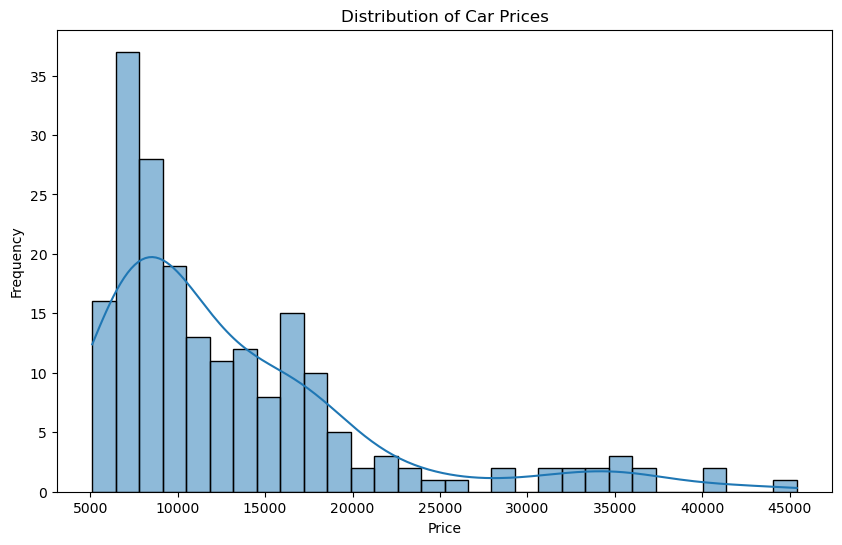

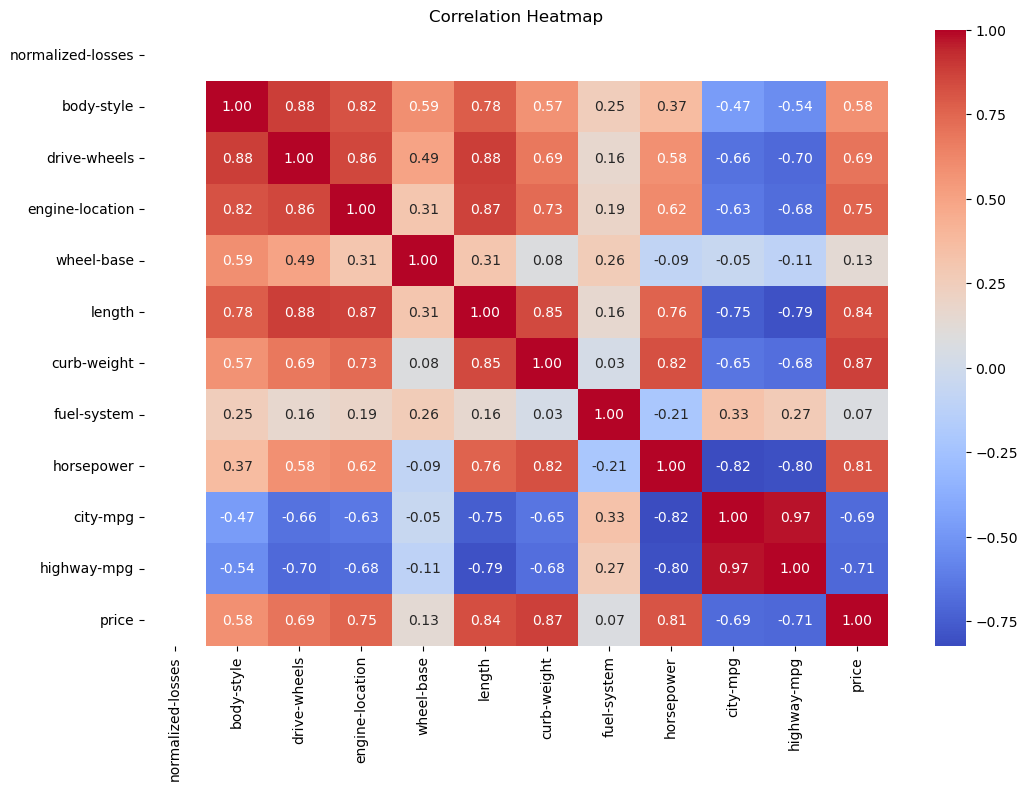

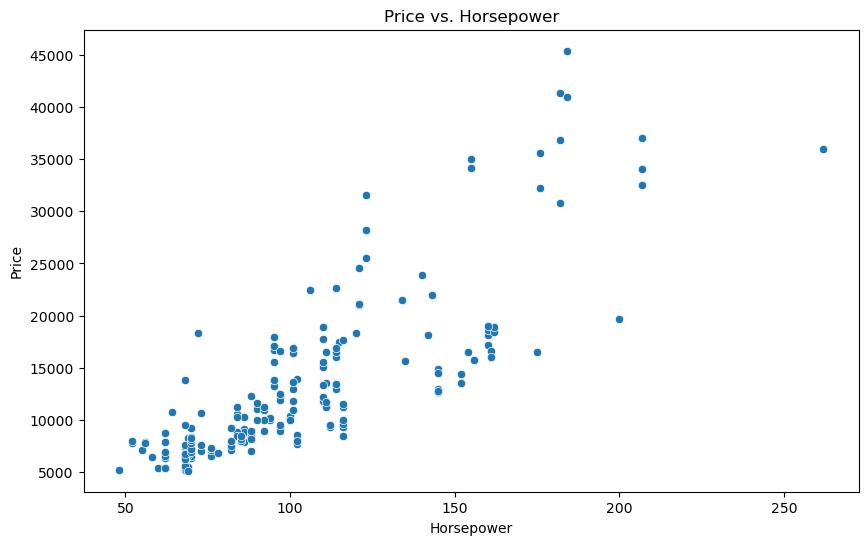

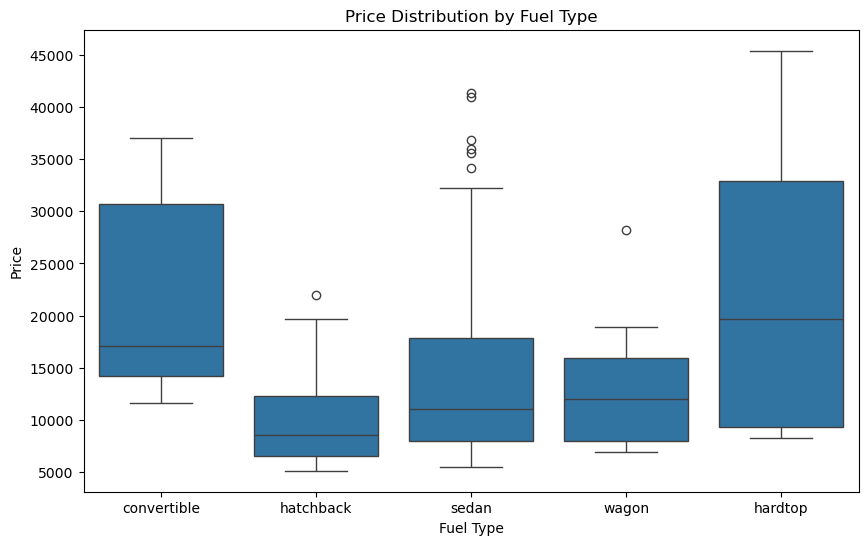

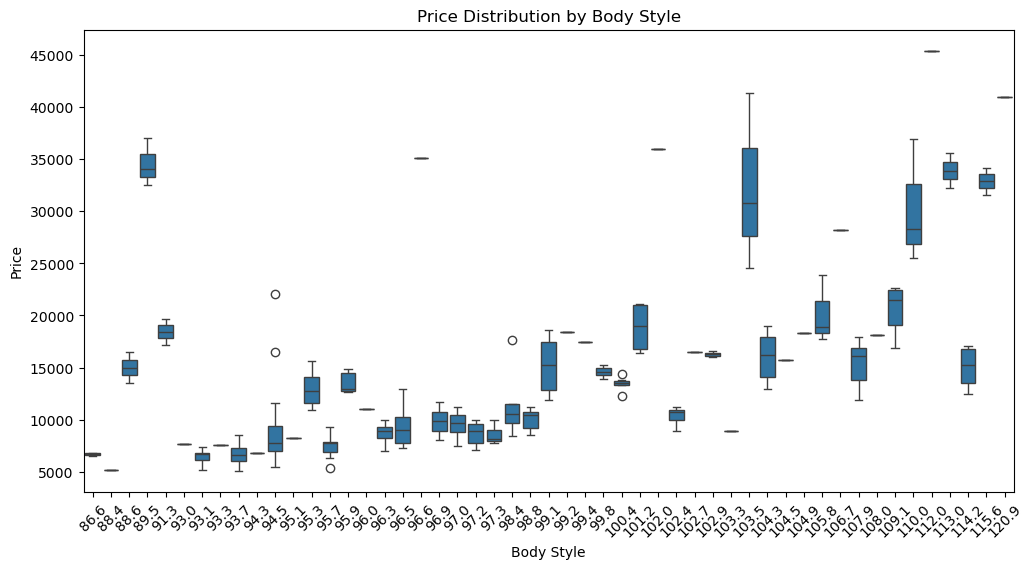

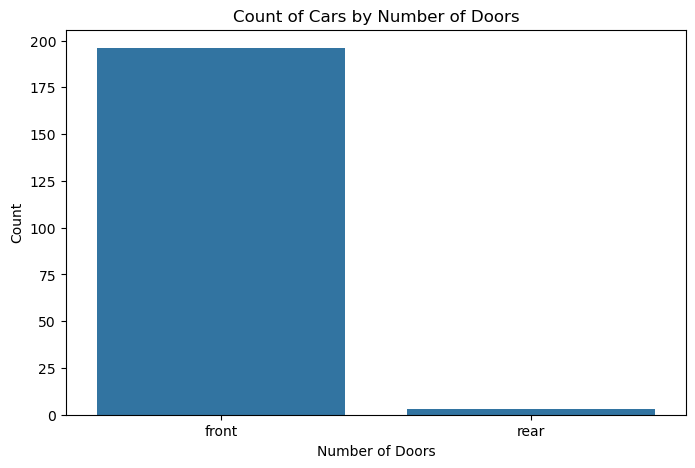

In [4]:
# Statistical summary
stats_summary = auto_data.describe(include='all')
print(stats_summary)

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(auto_data['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numerical columns for correlation
numeric_cols = auto_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Generate the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Price vs. Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='price', data=auto_data)
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

# Price distribution by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel-type', y='price', data=auto_data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Price distribution by body style
plt.figure(figsize=(12, 6))
sns.boxplot(x='body-style', y='price', data=auto_data)
plt.title('Price Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Count plot for the number of doors
plt.figure(figsize=(8, 5))
sns.countplot(x='num-of-doors', data=auto_data)
plt.title('Count of Cars by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.show()

### Step 4: Visualization

Here are some additional visualizations to understand the data better.

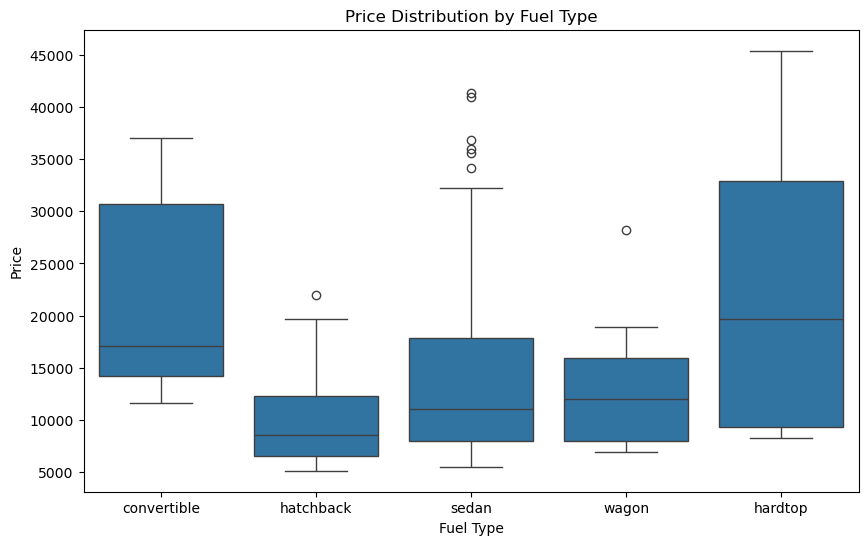

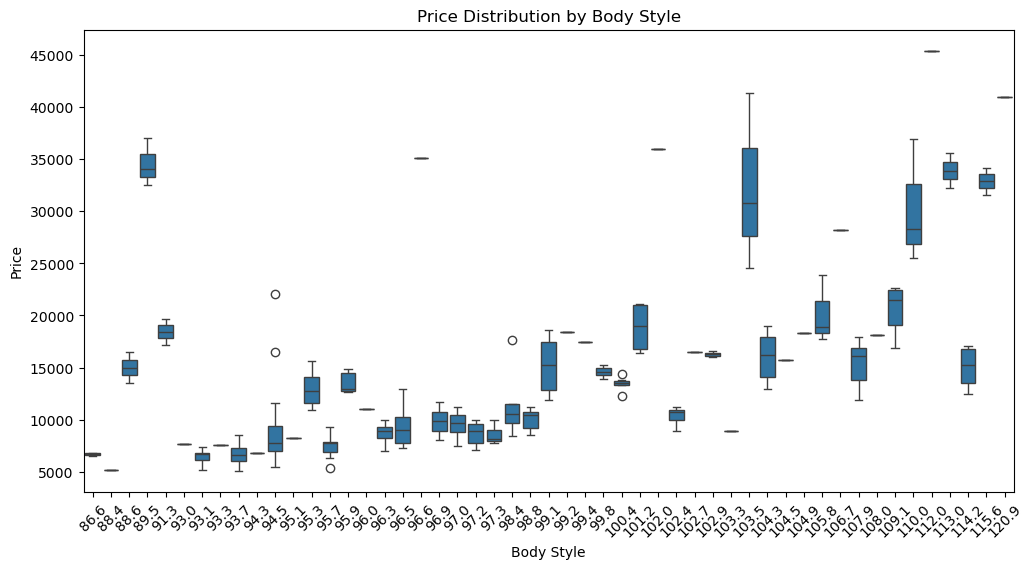

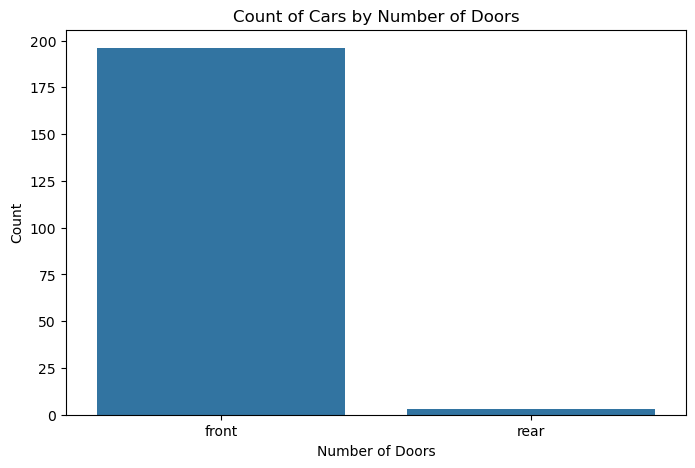

In [5]:
# Price distribution by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel-type', y='price', data=auto_data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Price distribution by body style
plt.figure(figsize=(12, 6))
sns.boxplot(x='body-style', y='price', data=auto_data)
plt.title('Price Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Count plot for the number of doors
plt.figure(figsize=(8, 5))
sns.countplot(x='num-of-doors', data=auto_data)
plt.title('Count of Cars by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.show()


Final Results and Summary
After performing the analysis and visualizations, you can summarize your findings:

Distribution of Prices: The histogram shows the distribution of car prices, indicating where most prices lie.
Correlation Analysis: The heatmap reveals that horsepower and engine size have a strong positive correlation with price.
Visual Insights: Box plots show how prices vary by fuel type and body style, indicating trends and outliers.
Modeling: A linear regression model can predict car prices based on several features, with metrics indicating the model's performance.